# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

In [3]:
def error(observed, theoretical):
    return abs((theoretical - observed) / observed)

In [4]:
def mean_over_median(a: np.ndarray, axis=None) -> float:
    return np.mean(a, axis=axis) / np.median(a, axis=axis)

In [5]:
def jackknife(sample: np.ndarray, estimator: callable) -> np.ndarray:
    return estimator(
        np.vstack(
            tuple(
                np.concatenate((sample[:i], sample[i + 1 :]))
                for i in range(sample.size)
            )
        ),
        axis=-1,
    )

In [6]:
def bootstrap(
    sample: np.ndarray, estimator: callable, resamples: int = 10_000
) -> np.ndarray:
    return estimator(
        rng.choice(sample, (resamples, sample.size)).reshape((resamples, sample.size)),
        axis=-1,
    )

# Problem 1

## A)
(Note, the following graphs plot density, not total occurrences)

In [7]:
alpha, beta, samples = 4, 1, 10**7

gamma = rng.gamma(alpha, beta, samples)
sample = rng.choice(gamma, 100, replace=False)

### Hidden Side (Population)

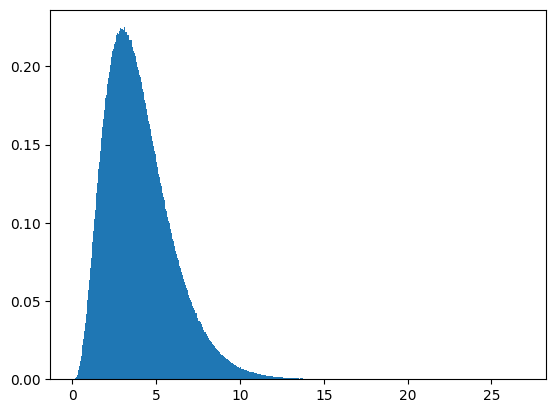

In [8]:
plt.hist(gamma, bins=1000, density=True)
plt.savefig(fname="Problem 1A Population.png")
plt.clf()

### Visible Side (Sample)

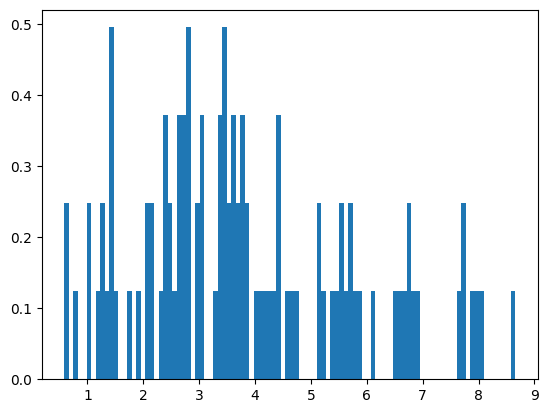

In [9]:
plt.hist(sample, bins=sample.size, density=True)
plt.savefig(fname="Problem 1A Sample.png")
plt.clf()

### Sample Mean $\mu$

In [10]:
np.mean(sample)

3.8268236606319515

### Analytic Mean $\alpha \over \beta$

In [11]:
analytic_mean = alpha / beta
analytic_mean

4.0

### Sample Variance $\sigma$

In [12]:
np.std(sample)

1.9336373659541477

### Analytic Variance $ \sqrt{\frac{\alpha}{\beta^2}} $

In [13]:
(alpha / beta**2) ** 0.5

2.0

## B)

### Population Estimator (mean over median)

In [14]:
gamma_estimator = np.mean(gamma) / np.median(gamma)
gamma_estimator

1.0893779900293836

### Sample estimator

In [15]:
sample_estimator = np.mean(sample) / np.median(sample)
sample_estimator

1.0931954885633515

#### Sample estimator Error (%)

In [16]:
sample_error = 100 * error(sample_estimator, gamma_estimator)
sample_error

0.3492054782429353

### Bootstrap

In [17]:
bootstrap_sample = bootstrap(sample, mean_over_median)

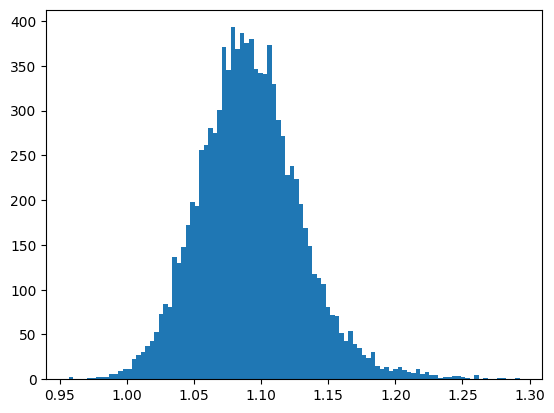

In [18]:
plt.hist(bootstrap_sample, bins=100)
plt.savefig(fname="Problem 1B Bootstrap.png")
plt.clf()


#### Bootstrap estimator

In [19]:
bootstrap_estimator = np.mean(bootstrap_sample)
bootstrap_estimator

1.0919274958412073

#### Bootstrap Error (%)

In [20]:
bootstrap_error = 100 * error(bootstrap_estimator, gamma_estimator)
bootstrap_error

0.23348673071553744

### Summary

In [21]:
print("---")
print("Estimator: Mean over Median")
print(f"Population: {gamma_estimator:.4}")
print()
print(f"Sample: {sample_estimator:.4}")
print(f"\tError: {sample_error:.4}%")
print()
print(f"Bootstrap: {bootstrap_estimator:.4}")
print(f"\tError: {bootstrap_error:.4}%")
print("---")

---
Estimator: Mean over Median
Population: 1.089

Sample: 1.093
	Error: 0.3492%

Bootstrap: 1.092
	Error: 0.2335%
---


# Problem 2

## Jackknife

In [22]:
jackknife_sample = jackknife(sample, mean_over_median)

### Jackknife Histogram

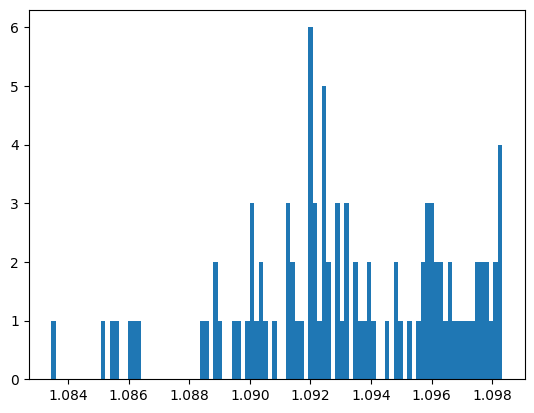

In [23]:
plt.hist(jackknife_sample, bins=100)
plt.savefig(fname="Problem 2 Jackknife.png")
plt.clf()

### Jackknife Estimator

In [24]:
jackknife_estimator = np.mean(jackknife_sample)
jackknife_estimator

1.0931947600212104

### Jackknife Error

#### Error with Sample

In [25]:
jackknife_error = 100 * error(jackknife_estimator, gamma_estimator)
jackknife_error

0.34913906756676466

#### Error with Analytic

In [26]:
analytic_median = alpha - 1 + np.log(2)

analytic_estimator = analytic_mean / analytic_median
analytic_estimator

1.083087081136455

In [27]:
jackknife_error_analytic = 100 * error(jackknife_estimator, analytic_estimator)
jackknife_error_analytic

0.9246000122209951

### Summary

In [28]:
print("---")
print("Estimator: Mean over Median")
print(f"Population: {gamma_estimator:.4}")
print()
print(f"Sample: {sample_estimator:.4}")
print(f"\tError: {sample_error:.4}%")
print()
print(f"Jackknife: {jackknife_estimator:.4}")
print(f"\tError (vs Population): {jackknife_error:.4}%")
print(f"\tError (vs Analytic): {jackknife_error_analytic:.4}%")
print("---")

---
Estimator: Mean over Median
Population: 1.089

Sample: 1.093
	Error: 0.3492%

Jackknife: 1.093
	Error (vs Population): 0.3491%
	Error (vs Analytic): 0.9246%
---


# Problem 3

In [29]:
p3_samples = 10**7
p3_N1 = rng.normal(1, 2, p3_samples)
p3_N2 = rng.normal(4, 1, p3_samples)

mask = rng.random(p3_samples) < 0.3

p3_population = p3_N1 * mask + p3_N2 * np.logical_not(mask)
p3_sample = rng.choice(p3_population, size=100, replace=False)

## Population and Sample

### Population

In [30]:
p3_population_estimator = np.mean(p3_population) / np.median(p3_population)

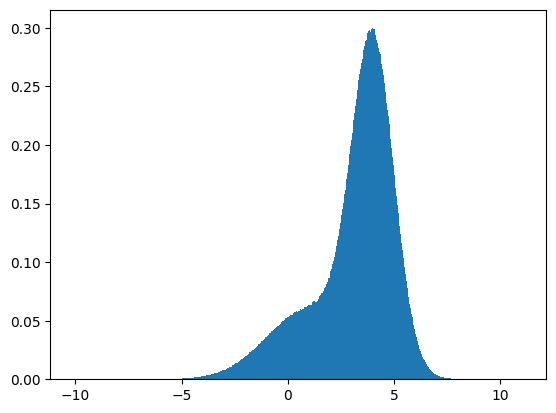

In [31]:
plt.hist(p3_population, bins=1000, density=True)
plt.savefig(fname="Problem 3 Population.png")
plt.clf()

### Sample

In [32]:
p3_sample_estimator = np.mean(p3_sample) / np.median(p3_sample)

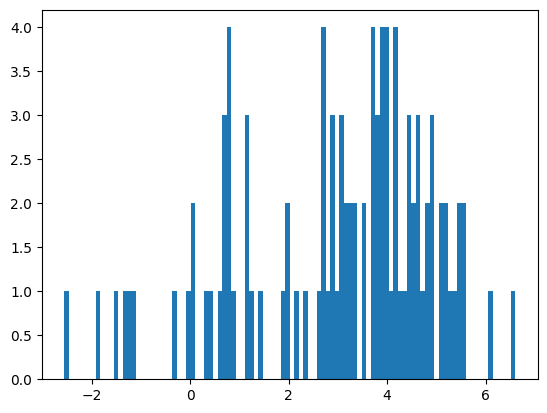

In [33]:
plt.hist(p3_sample, 100)
plt.savefig(fname="Problem 3 Sample.png")
plt.clf()

## Jackknife

In [34]:
p3_jackknife = jackknife(p3_sample, mean_over_median)
p3_jack_estimator = np.mean(p3_jackknife)

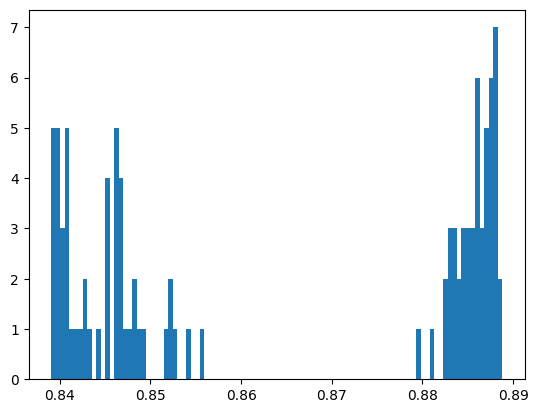

In [35]:
plt.hist(p3_jackknife, 100)
plt.savefig(fname="Problem 3 Jackknife.png")
plt.clf()

## Bootstrap

In [36]:
p3_bootstrap = bootstrap(p3_sample, estimator=mean_over_median)
p3_boot_estimator = np.mean(p3_bootstrap)

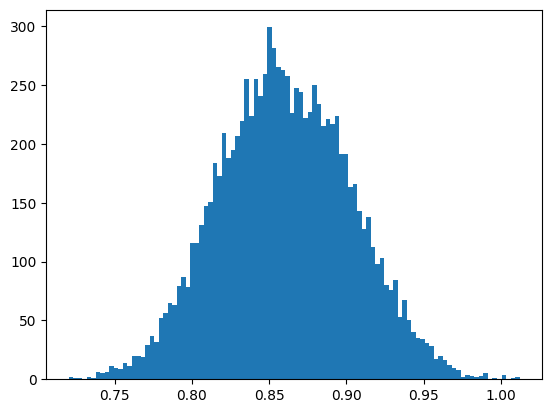

In [37]:
plt.hist(p3_bootstrap, 100)
plt.savefig(fname="Problem 3 Bootstrap.png")
plt.clf()

## Summary

In [38]:
print("---")
print("Estimator: Mean over Median")
print(f"Population: {p3_population_estimator:.4}")
print()
print(f"Sample: {p3_sample_estimator:.4}")
print(f"\tError: {error(p3_sample_estimator, p3_population_estimator):.4}%")
print()
print(f"Jackknife: {p3_jack_estimator:.4}")
print(f"\tError: {error(p3_jack_estimator, p3_population_estimator):.4}%")
print()
print(f"Bootstrap: {p3_boot_estimator:.4}")
print(f"\tError: {error(p3_boot_estimator, p3_population_estimator):.4}%")
print("---")

---
Estimator: Mean over Median
Population: 0.8715

Sample: 0.8646
	Error: 0.008065%

Jackknife: 0.8652
	Error: 0.007364%

Bootstrap: 0.8604
	Error: 0.01291%
---
